### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fatih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fatih\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fatih\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#!pip install matplotlib==3.4

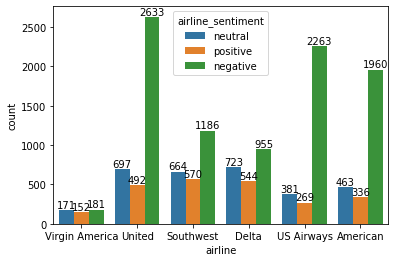

In [5]:
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment")
for p in ax.containers:
    ax.bar_label(p)

# Havayolu şirketleri bazında alınan yorum sayılarını görselleştiriyoruz.

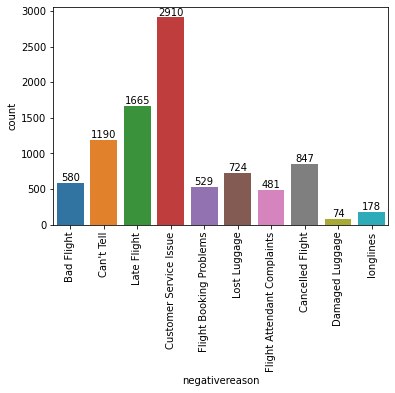

In [6]:
ax = sns.countplot(data =df, x ="negativereason")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);

# Olumsuz yorum sebeplerinin sayısını görselleştiriyoruz.

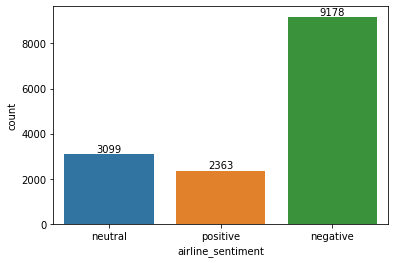

In [7]:
ax = sns.countplot(data =df, x = "airline_sentiment")
ax.bar_label(ax.containers[0]);

# classlarımızın sayısını görselleştiriyoruz.

In [8]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Cleaning Data

In [9]:
df2 = df.copy()

In [10]:
df2["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

### Cleaning URL, Tags, Mentions for Tweets

In [11]:
import re
s = "http\\:www.mynet.com #lateflight @airlines"
s = re.sub("http\S+", "", s).strip()
s

# \S boşluk hariç diğer tüm karakterleri temsil eder.
# http\S+, http ile başlayan ve http'den sonra boşluk hariç en az bir veya daha fazla karakter ihtiva eden paternleri temsil 
# eder.
# http\S*, http ile başlayan ve http'den sonra boşluk hariç en az sıfır veya daha fazla karakter ihtiva eden paternleri temsil
# eder.
# regex'in sub fonksiyonu kendisine verilen text içirisinde aradığımız paternlerini bulup silmemize veya istediğimiz bir 
# karakter/karakterlerle değiştirmemizi sağlar.
# re.sub("http\S+", "", s) kodu s değişkenine atadığımız text içerisinde http ile başlayan ve http'den sonra boşluk hariç en az
# bir veya daha fazla karakter ihtiva eden paternleri bulur ve siler.

# re.sub("http\S+", "a", s) kodu s değişkenine atadığımız text içerisinde http ile başlayan ve http'den sonra boşluk hariç en az
# bir veya daha fazla karakter ihtiva eden paternleri bulur ve a karakteri ile değiştirir.

'#lateflight @airlines'

In [12]:
s = re.sub("#\S+", "", s)
s

# tag'i temizliyoruz. Ancak gördüğünüz gibi text'in başında bir boşluk karakteri oluştu.

' @airlines'

In [13]:
s = re.sub("@\S+", "", s)
s.strip()

# mentionı temizliyoruz.

# \S boşluk hariç diğer tüm karakterleri temsil ettiğinden yukrıda gördüğünüz üzere boşluklara bir işlem yapmaz. Bu sebeple 
# textimizin başında veya sonunda kalan boşluk karakterlerini strip() fonksiyonu ile temizliyoruz.

''

In [14]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [15]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
       
    #9. joining
    return " ".join( text_cleaned)

In [16]:
cleaning_text = df2["text"].apply(cleaning)
cleaning_text.head()

# textimi temizleyip cleaning_text değişkenine atıyorum. Notebookun sonunda WordCloud görselleştirmesinde kullanacağız.

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Features and Label

In [17]:
df2 =df2[["airline_sentiment", "text"]]
df2.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df2["text"]
y = df2["airline_sentiment"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## Vectorization

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# preprocessor hyper-parametresine yukarıda tanımladığımız cleaning fonksiyonunu vererek temizlik işlemini CountVectorizer
# dönüşüm algortiması içerisinde yaptırabiliyoruz.
# min_df = 3    --> corpusumda 3'den daha az document'da (yorumda) geçen tokenleri ignore et.
# max_df = 1000 --> corpusumda 1000'den daha fazla document'da (yorumda) geçen tokenleri ignore et.

# max_df = 0.95 --> corpusumdaki yorumların %95'inde geçen tokenleri ignore et
# min_df olarak 2,3,4 gibi, max_df 0.95 ve üzeri değerler tercih edilebilir.

# max_features = 1500 --> corpusumda en sık kullanılan ilk 1500 feature (tokeni) dikkate al diğerlerini ignore et.

# ngram, textimizdeki kalıpların (isim tamlaması, sıfat tamlaması vb) daha iyi öğrenilmesi için kullanılır.
# "Çok güzel bir TV" yorumu için;
# ngram = 1 olarak tüm tokenler 1'er 1'er ayrışır. Çok, güzel, bir, TV
# ngram = 2 olarak tüm tokenler 2'şer 2'şer ayrışır. Çok güzel, güzel bir, bir TV
# ngram = 3 olarak tüm tokenler 3'er 3'er ayrışır. Çok güzel bir, güzel bir TV
# ngram_range = (1, 3) tüm tokenler ngram 1, 2 ve 3'e göre 1'er 1'er, 2'şer 2'şer ve 3'er 3'er tokenlerine ayrılır
# ngram_range = (1, 4) tüm tokenler ngram 1, 2, 3 ve 4'e göre 1'er 1'er, 2'şer 2'şer, 3'er 3'er ve 4'er 4'er tokenlerine ayrılır

In [23]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accommodate,accommodating,accommodation,accomplished,according,accordingly,...,yea,yeah,year,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youve,yr,yuma,yup,yvr,yyz,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [26]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    

## Naive Bayes

Naive Bayes ismi, algoritmanın temel varsayımı olan "özellikler arasında bağımlılık olmaması" ("naive") nedeniyle verilmiştir. Bu varsayım, gerçek dünya uygulamalarındaki özellikler arasındaki ilişkileri yok sayar ve her özellik için ayrı ayrı olasılıkları hesaplar. Bu varsayım, gerçek hayatta genellikle geçerli olmadığından, algoritmanın doğruluk oranını düşürebilir, ancak yine de Naive Bayes algoritması çok yaygın olarak kullanılır ve çok iyi sonuçlar verir.

Bayes Teoremi, olasılık kuramının temel prensiplerinden biridir. 

Bayes Teoremi, bir olayın gerçekleşme olasılığının, o olayın gerçekleşmesi için gerekli olan diğer tüm olayların gerçekleşme olasılıkları üzerinden hesaplamak için kullanılan matematiksel bir kuramdır.

Örneğin, P(Süper Telefon | Olumlu) --> "süper telefon" yorumunun olumlu olması için "süper" ve "telefon" tokenlerinin içerisinde geçtiği yorumları/textleri olumlu yapma olasılıklarını bilmemiz gerekir. Bu bilgiler olmadan bu yorumun olumlu olma olasılığını hesaplayamayız.

https://medium.com/analytics-vidhya/na%C3%AFve-bayes-algorithm-5bf31e9032a2

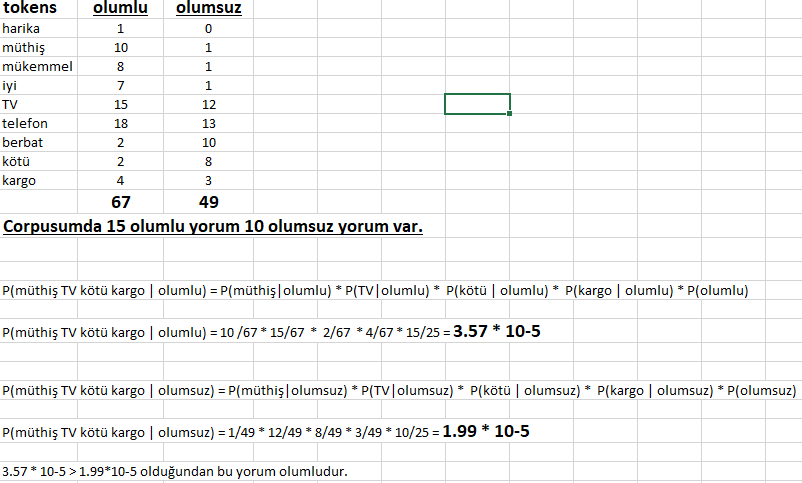

### Alpha Hyper-Parameter for Naive Bayes

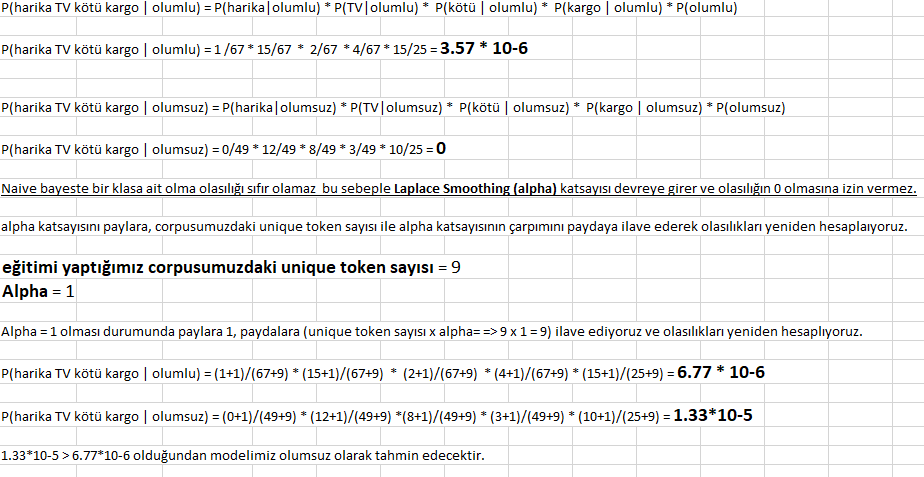

In [27]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [28]:
nb = MultinomialNB(alpha=10)
nb.fit(X_train_count,y_train)

# Hernekadar multiclasslar datalar için MultinomialNB, binary datalar için de BernoulliNB tavsiye ediliyor olsada. Datamızın 
# türü herne olursa olsun Herikisinide deneyip hangisinde iyi sonuçlar alıyorsak onunla devam edeceğiz.

# Gaussian algortiması NLP dataları için tavsiye edilmez.

# alpha hyper-parametresini overfiting'i kontrol için kullanabiliriz. Ancak alpha değerini çok büyütmek model performansımızı
# bozacağından overfitingi gidermek için sample_weight/class_weight'de kullanabiliriz.

MultinomialNB(alpha=10)

In [29]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1793   27   15]
 [ 467  129   24]
 [ 251   16  206]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.83      1835
     neutral       0.75      0.21      0.33       620
    positive       0.84      0.44      0.57       473

    accuracy                           0.73      2928
   macro avg       0.77      0.54      0.57      2928
weighted avg       0.74      0.73      0.68      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      7343
     neutral       0.80      0.25      0.38      2479
    positive       0.86      0.44      0.58      1890

    accuracy                           0.74     11712
   macro avg       0.79      0.56      0.60     11712
weighted avg       0.76      0.74      0.70     11712



In [30]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.714482
train_accuracy         0.734147
test_precision-neg     0.704816
train_precision-neg    0.717316
test_recall-neg        0.978891
train_recall-neg       0.984293
test_f1-neg            0.819534
train_f1-neg           0.829860
dtype: float64

In [31]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = MultinomialNB(alpha=10)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
pd.get_dummies(y_test)

,negative,neutral,positive
1756,1,0,0
10942,0,0,1
3797,1,0,0
6126,0,0,1
10600,1,0,0
...,...,...,...
8977,1,0,0
8509,1,0,0
8454,0,1,0
7397,1,0,0


In [ ]:
y_pred_proba

array([[9.99735997e-01, 7.20173366e-05, 1.91985736e-04],
       [7.49240406e-01, 1.17986425e-01, 1.32773169e-01],
       [9.85078843e-01, 1.38575572e-02, 1.06360012e-03],
       ...,
       [5.23031465e-01, 1.96245160e-01, 2.80723375e-01],
       [9.79688833e-01, 1.83116371e-02, 1.99952992e-03],
       [9.99972548e-01, 2.70547695e-05, 3.96839590e-07]])

In [ ]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test)

y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

In [ ]:
average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

0.9150051838843105

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1760   39   36]
 [ 365  212   43]
 [ 177   47  249]]
Test_Set
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      1835
     neutral       0.71      0.34      0.46       620
    positive       0.76      0.53      0.62       473

    accuracy                           0.76      2928
   macro avg       0.75      0.61      0.64      2928
weighted avg       0.75      0.76      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.77      0.97      0.86      7343
     neutral       0.76      0.40      0.53      2479
    positive       0.79      0.51      0.62      1890

    accuracy                           0.77     11712
   macro avg       0.77      0.63      0.67     11712
weighted avg       0.77      0.77      0.75     11712



In [ ]:
model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.745646
train_accuracy         0.765113
test_precision-neg     0.747594
train_precision-neg    0.761561
test_recall-neg        0.963365
train_recall-neg       0.970584
test_f1-neg            0.841856
train_f1-neg           0.853460
dtype: float64

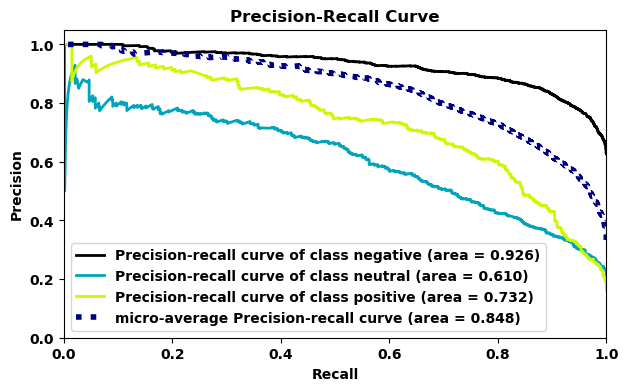

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.02, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

### Balanced Logistic Regression

In [ ]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[1304  433   98]
 [  98  447   75]
 [  34   96  343]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.71      0.80      1835
     neutral       0.46      0.72      0.56       620
    positive       0.66      0.73      0.69       473

    accuracy                           0.72      2928
   macro avg       0.68      0.72      0.68      2928
weighted avg       0.77      0.72      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.74      0.82      7343
     neutral       0.51      0.78      0.62      2479
    positive       0.67      0.75      0.71      1890

    accuracy                           0.75     11712
   macro avg       0.70      0.75      0.72     11712
weighted avg       0.80      0.75      0.76     11712



## SVM

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1710   81   44]
 [ 291  279   50]
 [ 124   50  299]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1835
     neutral       0.68      0.45      0.54       620
    positive       0.76      0.63      0.69       473

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      7343
     neutral       0.76      0.55      0.64      2479
    positive       0.80      0.63      0.70      1890

    accuracy                           0.82     11712
   macro avg       0.80      0.71      0.74     11712
weighted avg       0.81      0.82      0.81     11712



In [ ]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.777494
train_accuracy         0.816390
test_precision-neg     0.799702
train_precision-neg    0.828608
test_recall-neg        0.939396
train_recall-neg       0.956996
test_f1-neg            0.863922
train_f1-neg           0.888186
dtype: float64

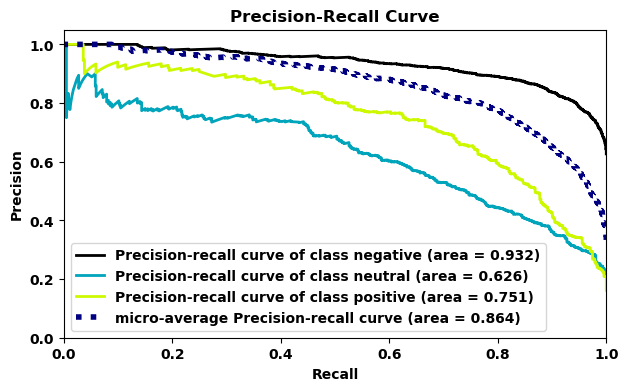

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = LinearSVC(C=0.01)

model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [ ]:
decision_function

array([[ 0.58641945, -1.44636328, -0.33460319],
       [-0.46805386, -0.20006612, -0.34348216],
       [ 0.21503391, -0.36054973, -0.91783901],
       ...,
       [-0.31239161, -0.20120096, -0.41046428],
       [ 0.30016202, -0.30509062, -1.00146571],
       [ 1.49934202, -1.16234014, -1.67554073]])

In [ ]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_AP_neg = average_precision_score(y_test_dummies["negative"], decision_function[:, 0])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[916 834  85]
 [107 451  62]
 [ 51 169 253]]
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.50      0.63      1835
     neutral       0.31      0.73      0.43       620
    positive       0.63      0.53      0.58       473

    accuracy                           0.55      2928
   macro avg       0.60      0.59      0.55      2928
weighted avg       0.70      0.55      0.58      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.90      0.62      0.74      7343
     neutral       0.40      0.82      0.53      2479
    positive       0.70      0.56      0.62      1890

    accuracy                           0.65     11712
   macro avg       0.67      0.67      0.63     11712
weighted avg       0.76      0.65      0.68     11712



In [ ]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.528603
train_accuracy         0.646346
test_precision-neg     0.843510
train_precision-neg    0.902867
test_recall-neg        0.463299
train_recall-neg       0.610892
test_f1-neg            0.597722
train_f1-neg           0.728680
dtype: float64

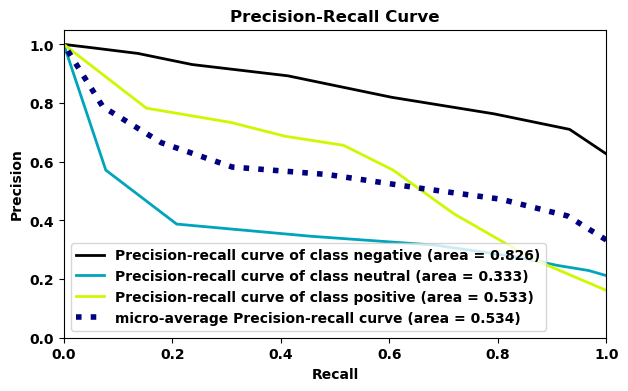

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1798   11   26]
 [ 522   60   38]
 [ 220    6  247]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      1835
     neutral       0.78      0.10      0.17       620
    positive       0.79      0.52      0.63       473

    accuracy                           0.72      2928
   macro avg       0.76      0.53      0.54      2928
weighted avg       0.74      0.72      0.65      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.74      1.00      0.85      7343
     neutral       0.97      0.20      0.34      2479
    positive       0.92      0.63      0.75      1890

    accuracy                           0.77     11712
   macro avg       0.88      0.61      0.64     11712
weighted avg       0.82      0.77      0.72     11712



In [ ]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.709870
train_accuracy         0.774030
test_precision-neg     0.698851
train_precision-neg    0.742443
test_recall-neg        0.984065
train_recall-neg       0.997428
test_f1-neg            0.817284
train_f1-neg           0.851251
dtype: float64

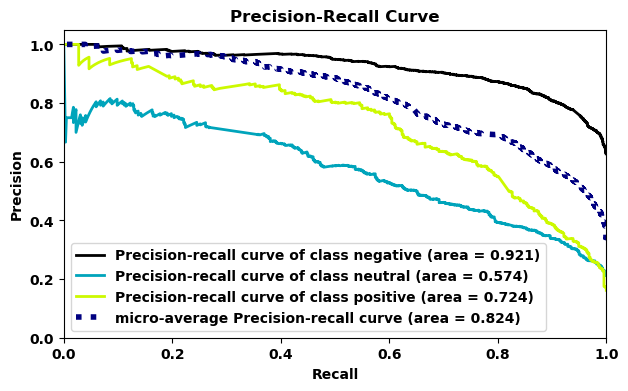

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

### Balance Random Forest

In [ ]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

RF MODEL BALANCED
[[1456  306   73]
 [ 154  401   65]
 [  53   99  321]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.79      0.83      1835
     neutral       0.50      0.65      0.56       620
    positive       0.70      0.68      0.69       473

    accuracy                           0.74      2928
   macro avg       0.69      0.71      0.69      2928
weighted avg       0.77      0.74      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.97      0.85      0.91      7343
     neutral       0.64      0.90      0.75      2479
    positive       0.87      0.82      0.85      1890

    accuracy                           0.86     11712
   macro avg       0.83      0.86      0.83     11712
weighted avg       0.89      0.86      0.86     11712



## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1563  197   75]
 [ 197  343   80]
 [  86   78  309]]
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      1835
     neutral       0.56      0.55      0.55       620
    positive       0.67      0.65      0.66       473

    accuracy                           0.76      2928
   macro avg       0.69      0.69      0.69      2928
weighted avg       0.76      0.76      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.87      0.88      0.88      7343
     neutral       0.61      0.62      0.61      2479
    positive       0.78      0.71      0.74      1890

    accuracy                           0.80     11712
   macro avg       0.75      0.74      0.74     11712
weighted avg       0.80      0.80      0.80     11712



In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.758624
train_accuracy         0.802226
test_precision-neg     0.843627
train_precision-neg    0.866649
test_recall-neg        0.856325
train_recall-neg       0.883774
test_f1-neg            0.849898
train_f1-neg           0.875122
dtype: float64

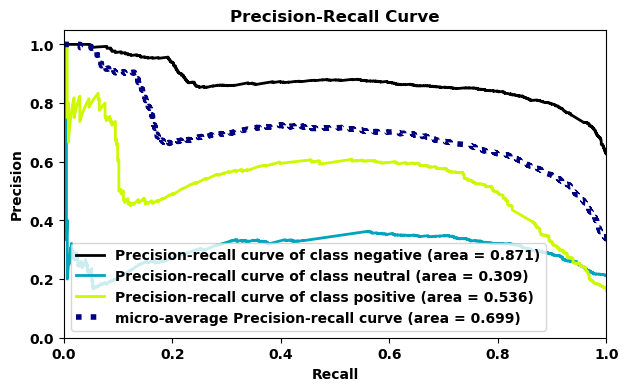

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# preprocessor hyper-parametrese yukarıda tanımladığımız cleaning fonksiyonunu vererek temizlik işlemini TfidfVectorizer
# dönüşüm algortiması içerisinde yaptırabiliyoruz.
# min_df = 3    --> corpusumda 3'den daha az document'da (yorumda) geçen tokenleri ignore et.
# max_df = 1000 --> corpusumda 1000'den daha fazla document'da (yorumda) geçen tokenleri ignore et.

# max_df = 0.95 --> corpusumdaki yorumların %95'inde geçen tokenleri ignore et
# min_df olarak 2,3 gibi, max_df 0.95 ve üzeri değerler tercih edilebilir.

# max_features = 1500 --> corpusumda en sık kullanılan ilk 1500 feature (tokeni) dikkate al diğerlerini ignore et.

# ngram, textimizdeki kalıpların (isim tamlaması, sıfat tamlaması vb) daha iyi öğrenilmesi için kullanılır.
# Çok güzel bir TV yorumu için;
# ngram = 1 olarak tüm tokenler 1'er 1'er ayrışır. Çok, güzel, bir, TV
# ngram = 2 olarak tüm tokenler 2'şer 2'şer ayrışır. Çok güzel, güzel bir, bir TV
# bgram = 3 olarak tüm tokenler 3'er 3'er ayrışır. Çok güzel bir, güzel bir TV
# ngram_range = (1, 3) tüm tokenler ngram 1, 2 ve 3'e göre 1'er 1'er, 2'şer 2'şer ve 3'er 3'er tokenlerine ayrılır
# ngram_range = (1, 4) tüm tokenler ngram 1, 2, 3 ve 4'e göre 1'er 1'er, 2'şer 2'şer, 3'er 3'er ve 4'er 4'er tokenlerine ayrılır

In [ ]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32545156, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accommodate,accommodating,accommodation,accomplished,according,accordingly,...,yea,yeah,year,yell,yelled,yelling,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youve,yr,yuma,yup,yvr,yyz,zero,zone
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11708,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11709,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11710,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Comparisons  TF-IDF

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1802   25    8]
 [ 426  172   22]
 [ 248   31  194]]
Test_Set
              precision    recall  f1-score   support

    negative       0.73      0.98      0.84      1835
     neutral       0.75      0.28      0.41       620
    positive       0.87      0.41      0.56       473

    accuracy                           0.74      2928
   macro avg       0.78      0.56      0.60      2928
weighted avg       0.76      0.74      0.70      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.99      0.85      7343
     neutral       0.84      0.35      0.50      2479
    positive       0.91      0.51      0.65      1890

    accuracy                           0.78     11712
   macro avg       0.84      0.62      0.67     11712
weighted avg       0.80      0.78      0.75     11712



In [ ]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.731643
train_accuracy         0.774277
test_precision-neg     0.721593
train_precision-neg    0.751007
test_recall-neg        0.978890
train_recall-neg       0.988818
test_f1-neg            0.830756
train_f1-neg           0.853659
dtype: float64

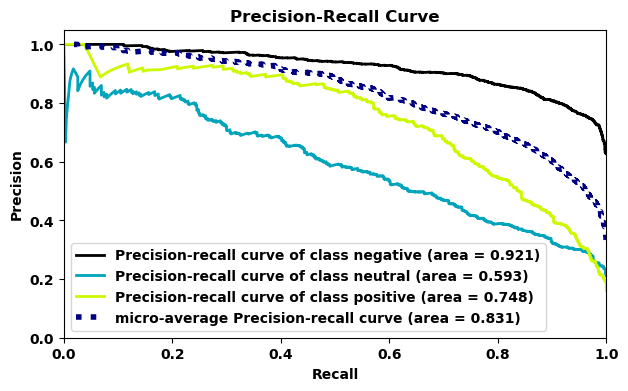

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = MultinomialNB()

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1757   51   27]
 [ 332  256   32]
 [ 144   47  282]]
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.96      0.86      1835
     neutral       0.72      0.41      0.53       620
    positive       0.83      0.60      0.69       473

    accuracy                           0.78      2928
   macro avg       0.78      0.66      0.69      2928
weighted avg       0.78      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.82      0.97      0.89      7343
     neutral       0.82      0.53      0.64      2479
    positive       0.87      0.62      0.73      1890

    accuracy                           0.82     11712
   macro avg       0.84      0.71      0.75     11712
weighted avg       0.83      0.82      0.81     11712



In [ ]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.771432
train_accuracy         0.821124
test_precision-neg     0.776195
train_precision-neg    0.813107
test_recall-neg        0.960370
train_recall-neg       0.976743
test_f1-neg            0.858497
train_f1-neg           0.887444
dtype: float64

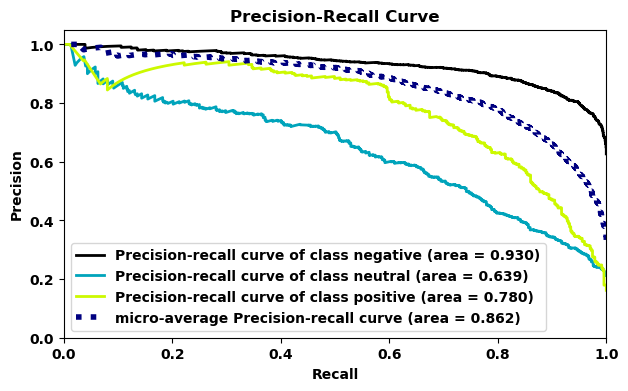

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C=0.4, max_iter=1000)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

### Balanced Logistic Regression

In [ ]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[1431  305   99]
 [ 121  427   72]
 [  39   71  363]]
Test_Set
              precision    recall  f1-score   support

    negative       0.90      0.78      0.84      1835
     neutral       0.53      0.69      0.60       620
    positive       0.68      0.77      0.72       473

    accuracy                           0.76      2928
   macro avg       0.70      0.75      0.72      2928
weighted avg       0.79      0.76      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      7343
     neutral       0.61      0.80      0.69      2479
    positive       0.74      0.84      0.79      1890

    accuracy                           0.81     11712
   macro avg       0.76      0.82      0.78     11712
weighted avg       0.84      0.81      0.82     11712



## SVM

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1738   63   34]
 [ 312  263   45]
 [ 124   43  306]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      1835
     neutral       0.71      0.42      0.53       620
    positive       0.79      0.65      0.71       473

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.84      0.97      0.90      7343
     neutral       0.83      0.56      0.67      2479
    positive       0.87      0.68      0.76      1890

    accuracy                           0.84     11712
   macro avg       0.84      0.74      0.78     11712
weighted avg       0.84      0.84      0.83     11712



In [ ]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.782019
train_accuracy         0.837963
test_precision-neg     0.790376
train_precision-neg    0.832860
test_recall-neg        0.957101
train_recall-neg       0.974866
test_f1-neg            0.865746
train_f1-neg           0.898282
dtype: float64

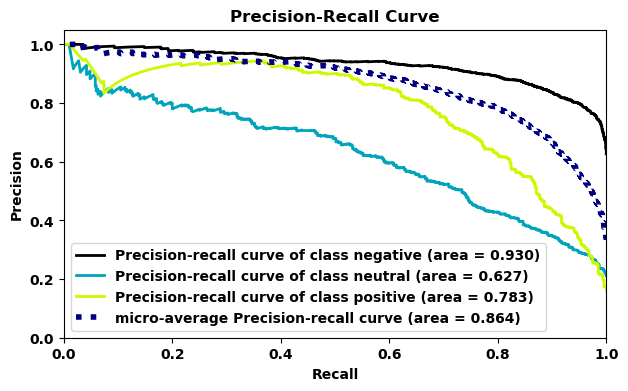

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LinearSVC(C=0.1)

model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_tf_idf)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [ ]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], decision_function[:, 0])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

KNN MODEL
[[ 278 1546   11]
 [  73  532   15]
 [  41  339   93]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.15      0.25      1835
     neutral       0.22      0.86      0.35       620
    positive       0.78      0.20      0.31       473

    accuracy                           0.31      2928
   macro avg       0.57      0.40      0.30      2928
weighted avg       0.62      0.31      0.28      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.87      0.29      0.44      7343
     neutral       0.26      0.91      0.40      2479
    positive       0.83      0.24      0.38      1890

    accuracy                           0.41     11712
   macro avg       0.65      0.48      0.41     11712
weighted avg       0.74      0.41      0.42     11712



In [ ]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.300204
train_accuracy         0.407844
test_precision-neg     0.709476
train_precision-neg    0.863610
test_recall-neg        0.139039
train_recall-neg       0.281674
test_f1-neg            0.232049
train_f1-neg           0.423972
dtype: float64

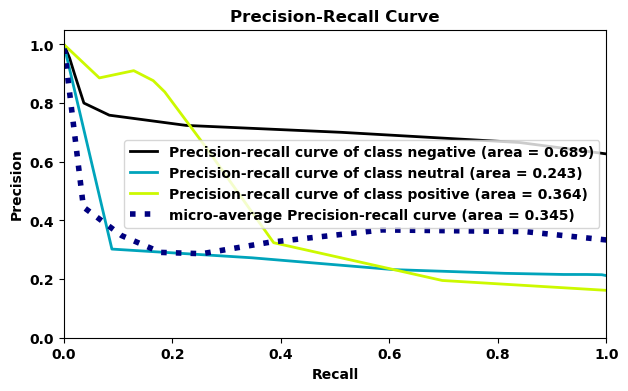

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

## RandomForest

In [ ]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1805   10   20]
 [ 533   52   35]
 [ 243    6  224]]
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1835
     neutral       0.76      0.08      0.15       620
    positive       0.80      0.47      0.60       473

    accuracy                           0.71      2928
   macro avg       0.76      0.51      0.52      2928
weighted avg       0.73      0.71      0.64      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.73      1.00      0.84      7343
     neutral       0.98      0.21      0.34      2479
    positive       0.94      0.58      0.72      1890

    accuracy                           0.76     11712
   macro avg       0.88      0.60      0.64     11712
weighted avg       0.82      0.76      0.72     11712



In [ ]:
model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.706967
train_accuracy         0.766308
test_precision-neg     0.693891
train_precision-neg    0.733746
test_recall-neg        0.988016
train_recall-neg       0.998230
test_f1-neg            0.815224
train_f1-neg           0.845792
dtype: float64

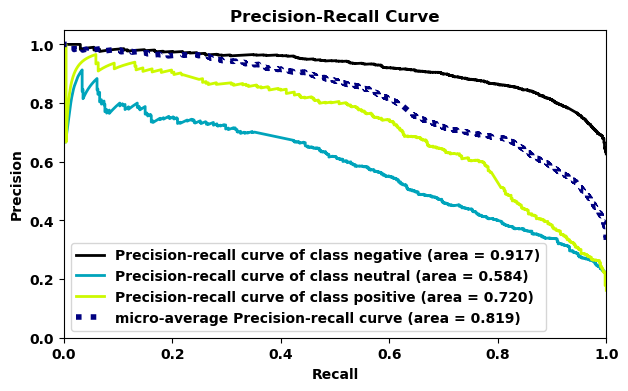

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

### Balanced Random Forest

In [ ]:
rf = RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL BALANCED
[[1356  384   95]
 [ 131  422   67]
 [  46  108  319]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.74      0.81      1835
     neutral       0.46      0.68      0.55       620
    positive       0.66      0.67      0.67       473

    accuracy                           0.72      2928
   macro avg       0.67      0.70      0.67      2928
weighted avg       0.76      0.72      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.76      0.84      7343
     neutral       0.52      0.80      0.63      2479
    positive       0.75      0.72      0.73      1890

    accuracy                           0.77     11712
   macro avg       0.73      0.76      0.73     11712
weighted avg       0.81      0.77      0.78     11712



## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1536  227   72]
 [ 223  337   60]
 [  99   74  300]]
Test_Set
              precision    recall  f1-score   support

    negative       0.83      0.84      0.83      1835
     neutral       0.53      0.54      0.54       620
    positive       0.69      0.63      0.66       473

    accuracy                           0.74      2928
   macro avg       0.68      0.67      0.68      2928
weighted avg       0.74      0.74      0.74      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      7343
     neutral       0.61      0.62      0.62      2479
    positive       0.83      0.72      0.77      1890

    accuracy                           0.80     11712
   macro avg       0.76      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.736937
train_accuracy         0.796239
test_precision-neg     0.821348
train_precision-neg    0.851315
test_recall-neg        0.843115
train_recall-neg       0.873969
test_f1-neg            0.832032
train_f1-neg           0.862484
dtype: float64

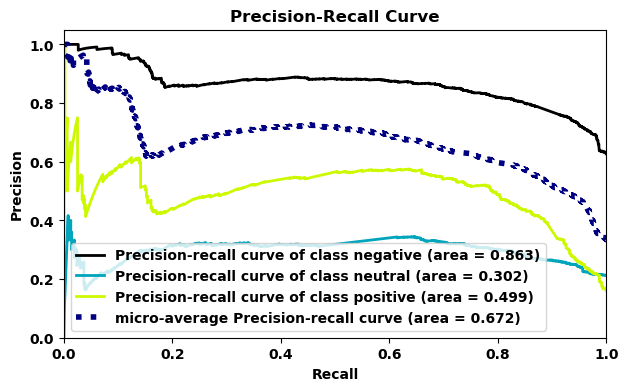

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

In [ ]:
nb_count_f1_neg[0]

0.8251265531523241

## Compare Scoring

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], knn_count_f1_neg[0],
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], knn_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0], 
                                                  knn_count_rec_neg[0], rf_count_rec_neg[0], ada_count_rec_neg[0], 
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0], 
                                                  knn_tfidf_rec_neg[0], rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]],
                        
                        "Average_Precision_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                           knn_tfidf_AP_neg, rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

compare

,Model,F1_Score_Negative,Recall_Score_Negative,Average_Precision_Score_Negative
0,NaiveBayes_count,0.825127,0.977112,0.915005
1,LogReg_count,0.850858,0.959128,0.926449
2,SVM_count,0.863636,0.931880,0.932461
3,KNN_count,0.629770,0.499183,0.826211
4,Random Forest_count,0.821943,0.979837,0.921165
5,AdaBoost_count,0.849226,0.851771,0.870604
6,NaiveBayes_tfidf,0.836001,0.982016,0.920986
7,LogReg_tfidf,0.863815,0.957493,0.930030
8,SVM_tfidf,0.867049,0.947139,0.930124
9,KNN_tfidf,0.249663,0.151499,0.689384


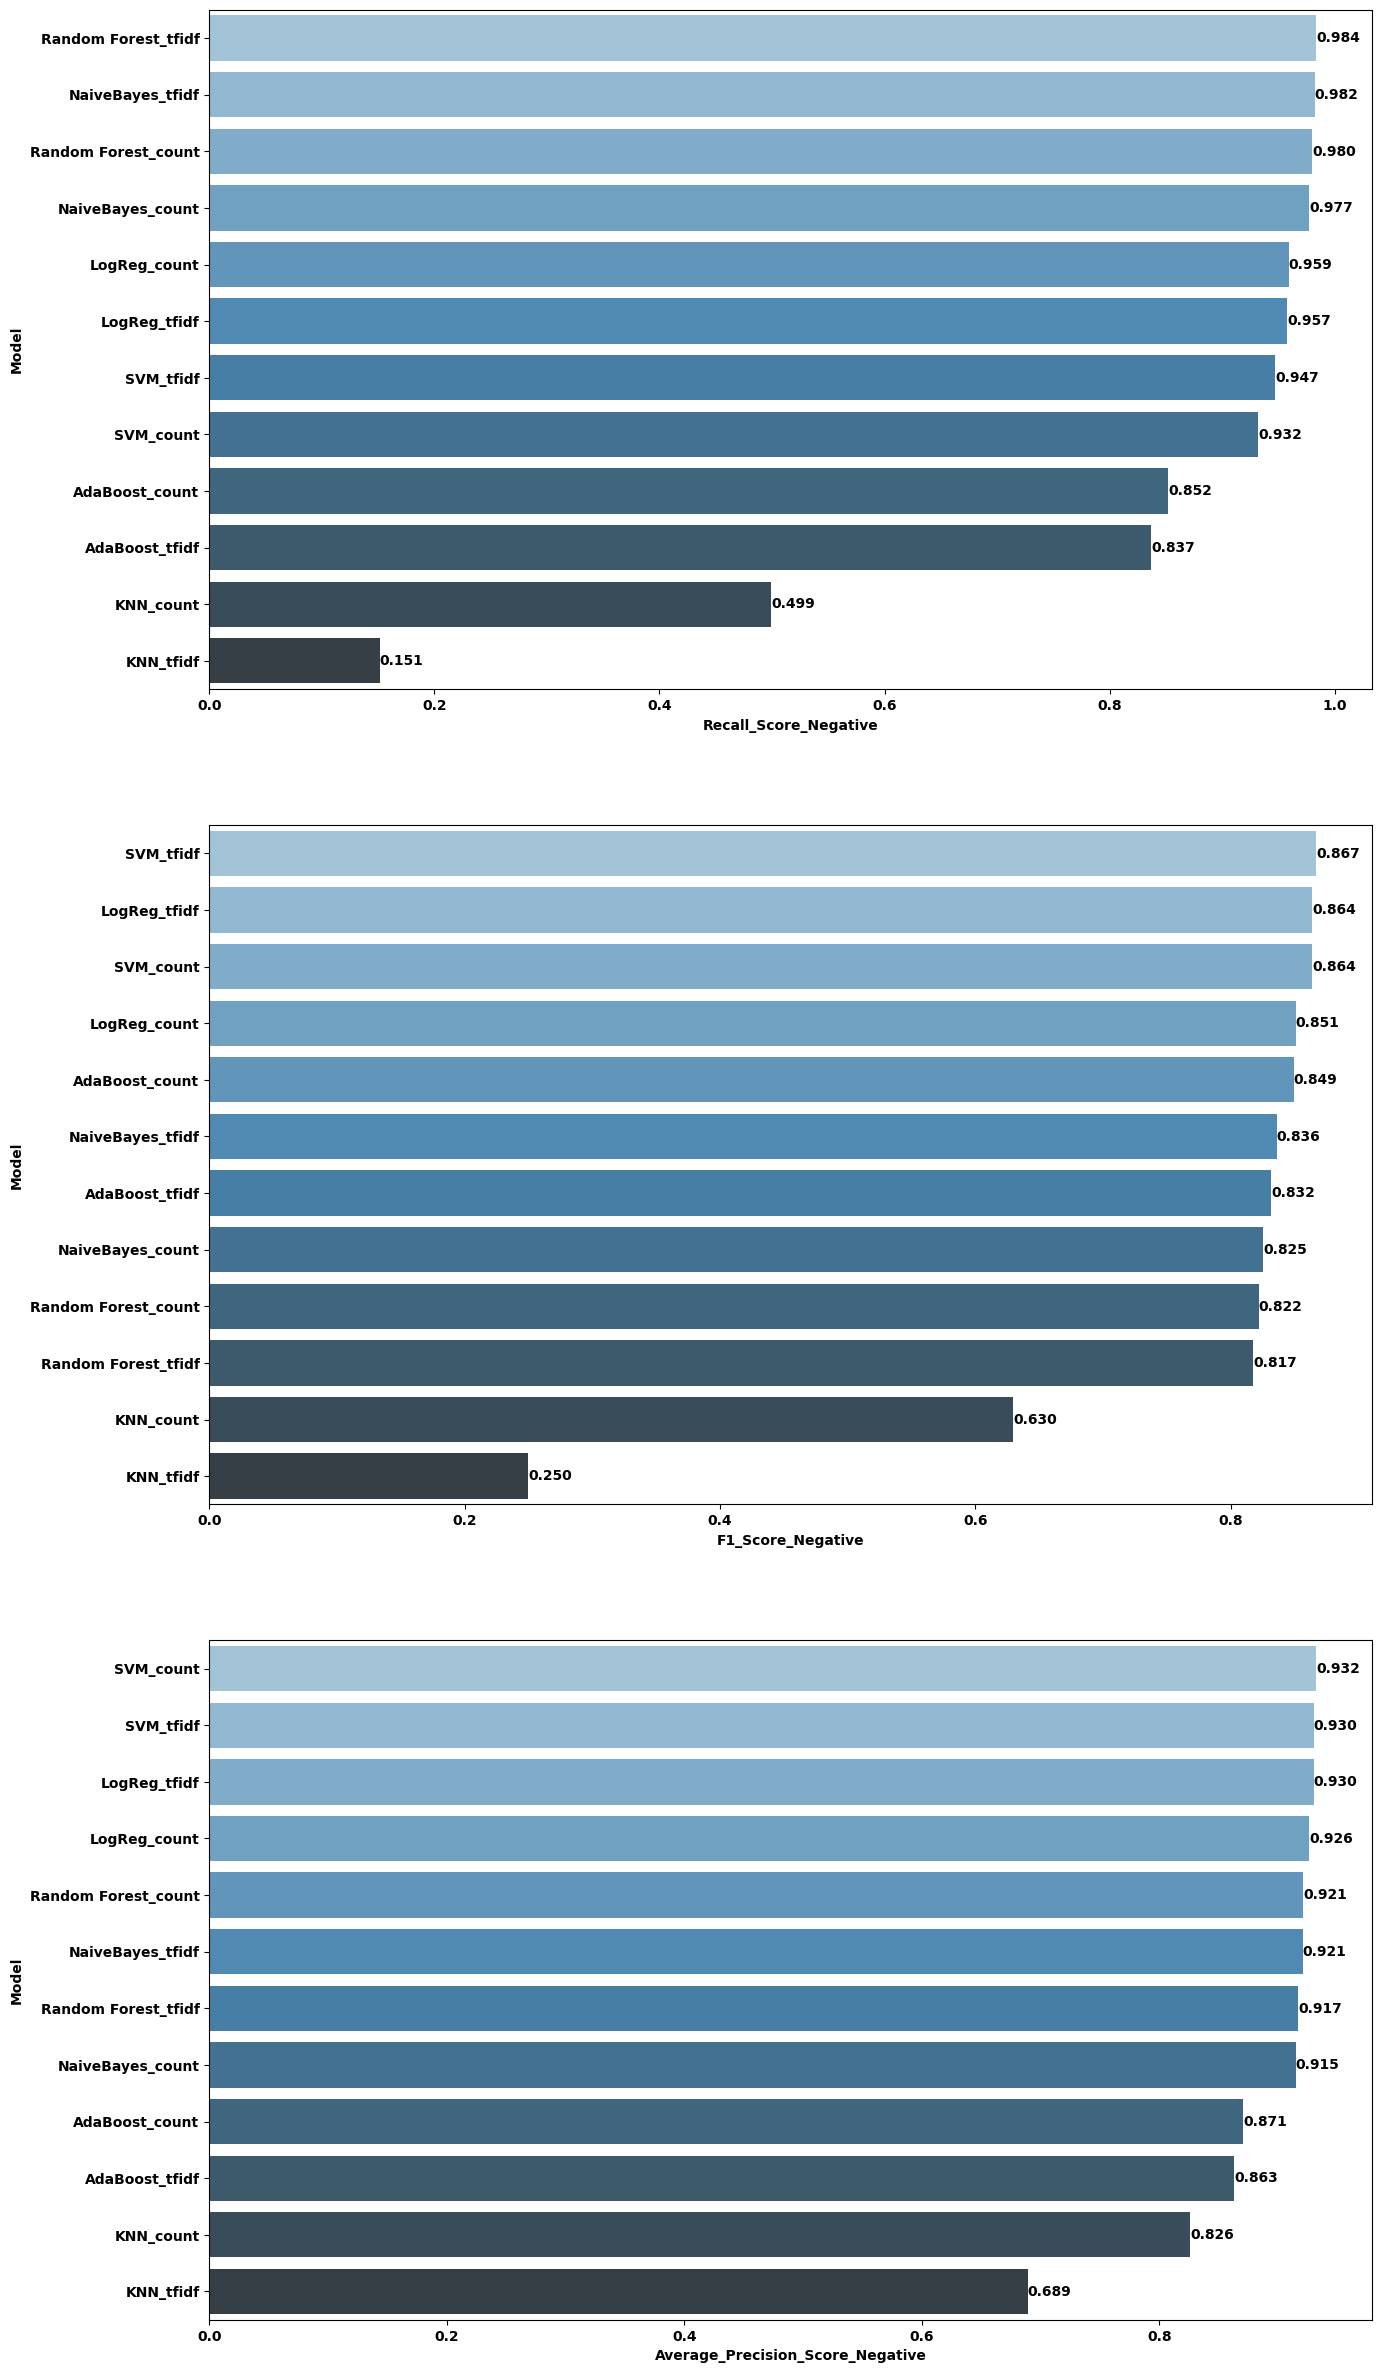

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")            
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score_Negative", ascending=False)
ax=sns.barplot(x="Average_Precision_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

# hernekadar RF ve NB recall scorları daha yüksek olsa da F1 scorları daha düşük buda bize bu modellerin precision
# scorlarının logreg veya SVM'ye nispeten daha düşük olduğunu gösterir.

# Bizim için tekbaşıan recall'un çok yüksek olması önemli değil. Recall ile birlikte precisionın da olabildiğince yüksek
# olması. Bu sebeple logreg tf-idf ile devam edeceğiz.

## For New Tweets, prediction with pipeline


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=3)),
                 ('log',LogisticRegression(C=0.4, max_iter=1000))])

In [ ]:
X.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [ ]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x000001C3E5EA6040>)),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

## Prediction

In [ ]:
tweet = "it was not the worst flight i have ever been."
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [ ]:
tweet = "I don't like flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [ ]:
tweet = "I like flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

# neden bilemediğini aşağıda analiz edeceğiz.

array(['negative'], dtype=object)

In [ ]:
tweet = "it is amazing flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [ ]:
tweet = "it isn't amazing flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

# neden bilemediğini aşağıda analiz edeceğiz.

array(['positive'], dtype=object)

In [ ]:
tweet = "I don't think I'll ever use American Airlines anymore"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [ ]:
tweet = "ok flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['neutral'], dtype=object)

In [ ]:
tweets = cleaning_text
tweets.head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

In [ ]:
for i in enumerate(tweets):
    print(i)

# öncelikle herbir tweet/yoruma karşılık gelecek şekilde enumerate fonksiyonu ile index numaraları atamak istiyorum. 
# Burda elde ettiğim index numaraları ile yorumlara karşılık gelen targetimın classını görmek istiyorum.
# örnek, (1, 'plus youve added commercial experience tacky') 1'inci index'teki 'plus youve added commercial experience tacky'
# yorumunun classını görmek için y[1] kullanarak yorumun hangi classa ait olduğunu görebileceğim.
# Bu işlemi neden yaptığımızı aşağıda kuracağımız for döngülerinde daha iyi anlıyacağız.

(0, 'said')
(1, 'plus youve added commercial experience tacky')
(2, 'didnt today must mean need take another trip')
(3, 'really aggressive blast obnoxious entertainment guest face amp little recourse')
(4, 'really big bad thing')
(5, 'seriously would pay flight seat didnt playing really bad thing flying va')
(6, 'yes nearly every time fly vx ear worm go away')
(7, 'really missed prime opportunity men without hat parody')
(8, 'well')
(9, 'amazing arrived hour early youre good')
(10, 'know suicide second leading cause death among teen')
(11, 'lt pretty graphic much better minimal iconography')
(12, 'great deal already thinking trip amp havent even gone trip yet p')
(13, 'im flying sky u take away travel')
(14, 'thanks')
(15, 'schedule still mia')
(16, 'excited first cross country flight lax mco ive heard nothing great thing virgin america')
(17, 'flew nyc sfo last week couldnt fully sit seat due two large gentleman either side help')
(18, 'flying')
(19, 'know would amazingly awesome plea

In [ ]:
counter = 0
for i,j in enumerate(tweets):
    if "dont like" in j and y[i]=="negative":
        counter += 1
print(counter)

# içerisinde "dont like" tokenleri birlikte geçen ve aynı zamanda olumsuz olan yorumların sayısını bulmak istiyorum
# Bu şekilde datamda eğitim için yeterli veri var mı? yok mu? daha iyi anlayabileceğim.
# Model 14 tane "dont like"dan öğrenebilir. Bu kapsamda model "I dont like flight" yorumunu negative olarak doğru bilmiş.

14


In [37]:
counter = 0
for i,j in enumerate(tweets):
    if "like" in j and y[i]=="positive":
        counter += 1
print(counter)

# şimdi yukardaki I like flight yorumunu neden bilemediğine bakalım.
# like tokeninin geçtiği toplam 66 tane olumlu yorum varken. Aşağıda da gördüğümüz gibi olumsuz yorumlarda 304 defa geçiyor.
# model like tokeni çoğunlukla olumsuz yorumlarda geçtiği için tahminini olumsuz olarak yapmış.

66


In [ ]:
counter = 0
for i,j in enumerate(tweets):
    if "like" in j and y[i]=="negative":
        counter += 1
print(counter)

304


In [ ]:
counter = 0
for i,j in enumerate(tweets):
    if "isnt amazing" in j and y[i]=="negative":
        counter += 1
print(counter)

# şimdi yukardaki it isn't amazing flight yorumunu neden bilemediğine bakalım.
# isnt amazing tokenleri birlikte olumsuz yorumlarda hiç kullanılmadığından, olumlu yorumlarda 78 defa geçen amazing tokenine
# göre bir tahminde bulunup yoruma olumlu demiş.

0


In [ ]:
counter = 0
for i,j in enumerate(tweets):
    if "amazing" in j and y[i]=="positive":
        counter += 1
print(counter)

78


## WordCloud - Repetition of Words

## Collect Words

In [34]:
tweets = cleaning_text
tweets

0                                                     said
1             plus youve added commercial experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight no warning communic...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [35]:
all_words = " ".join(tweets)

In [36]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

## Create Word Cloud

In [ ]:
#pip install wordcloud
#conda install -c conda-forge wordcloud

In [33]:
from wordcloud import WordCloud

# Wordcloud, metin dosyalarındaki kelime sıklığını görsel olarak temsil etmek için kullanılır. Bu görsel temsilde, metin 
# dosyasındaki kelimelerin görsel büyüklüğü, sıklığına göre belirlenir. Böylece, metin dosyasındaki en sık kullanılan kelimeler
# en büyük olarak görüntülenir. 

# bir sosyal medya hesabından toplanan yorumların içeriğini analiz etmek için wordcloud kullanabilir. Bu yorumlarda en sık geçen
# tokenler dikkate alınarak hangi konunun tartışıldığı veya ön plana çıktığı analiz edilebilir.

In [38]:
worldcloud = WordCloud(background_color="red", max_words =250)

# arka plan rengi beyaz olacak şekilde ve corpusta en sık geçen ilk 250 tokenden bir görsel oluştur.

In [39]:
worldcloud.generate(all_words)

# generate komutu ile yukarda verdiğimiz talimatlara göre datamızda en sık geçen ilk 250 token belirlenir.

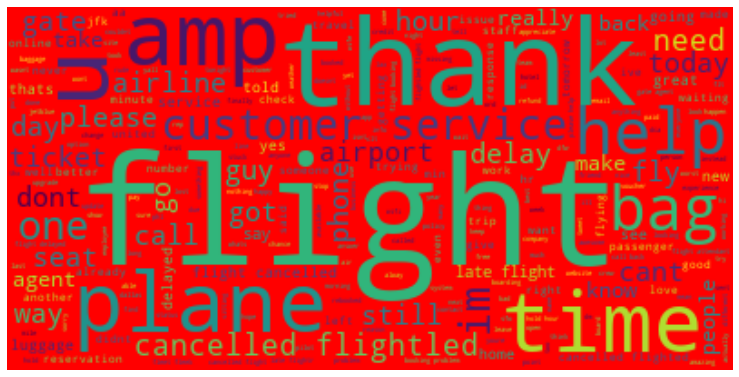

In [40]:
import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()